In [131]:
#!pip3 install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 825.0 kB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import sklearn
import urllib.request

from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn import datasets
from sklearn import decomposition
from sklearn import metrics
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [11]:
# Formating the positioning, size and shape of plotted graphs
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

sb.set_style('whitegrid')

# Limiting 

In [3]:
# Generating synthetic data representing the number of rooms in a hypothetical home
rooms = 2 * np.random.rand(100, 1) + 3

print(rooms[1:10])

[[3.19844476]
 [3.13511423]
 [4.52825091]
 [4.52242882]
 [4.00756734]
 [4.39570214]
 [4.299469  ]
 [4.70054773]
 [3.81637231]]


In [5]:
# Generating synthetic data representing the price of a hypothetical home
price = 265 + 6 * rooms + abs(np.random.rand(100, 1))

print(price[1:10])

[[284.44020281]
 [284.66618791]
 [292.71150429]
 [292.65553657]
 [289.08000165]
 [291.52907954]
 [290.83302597]
 [293.38166906]
 [288.88924248]]


Text(0, 0.5, 'Average Home Price (1000s USD)')

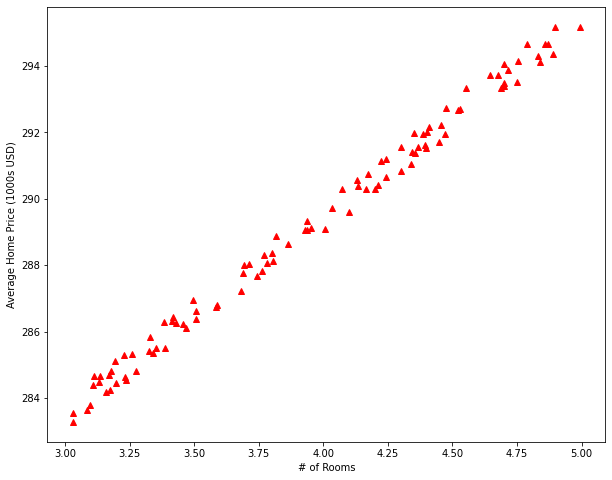

In [6]:
# Plotting a point plot to display the relationship between the number of rooms and the price of a house
# 'r^': Indicates that a point plot is desired
plt.plot(rooms, price, 'r^')
plt.xlabel('# of Rooms')
plt.ylabel('Average Home Price (1000s USD)')

In [8]:
# Simple Algebra
# Simple Linear Regression
# Assumptions:
# 1. All variable continous numeric, not categorical
# 2. Data free of missing variables or outliers
# 3. Linear relationship present between predictors and predictant
# 4. All predictors independent from one another
# 5. Residuals (prediction errors) normally distributed

# y = mx + b
# b = intercept = 265

x = rooms
y = price

# Carrying out linear regression on the synthesized data in order to create a model equation
LinReg = LinearRegression()
LinReg.fit(x, y)

print(LinReg.intercept_, LinReg.coef_)

[265.70290914] [[5.94419148]]


In [9]:
# Calculating R Squared
# Portrays how well the model performed
print(LinReg.score(x, y))

0.9928532965515178


In [31]:
# Multiple Linear Regression

# Loading in the data
enrollmentForecastData = pd.read_csv('EnrollmentForecast.csv')

# Setting up column names
# Columns include year, # of enrollments, percent unemployment rate, # of graduations and average income
# Year 1 equivalent to the data's original starting date of 1961
enrollmentForecastData.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']

enrollmentForecastData.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


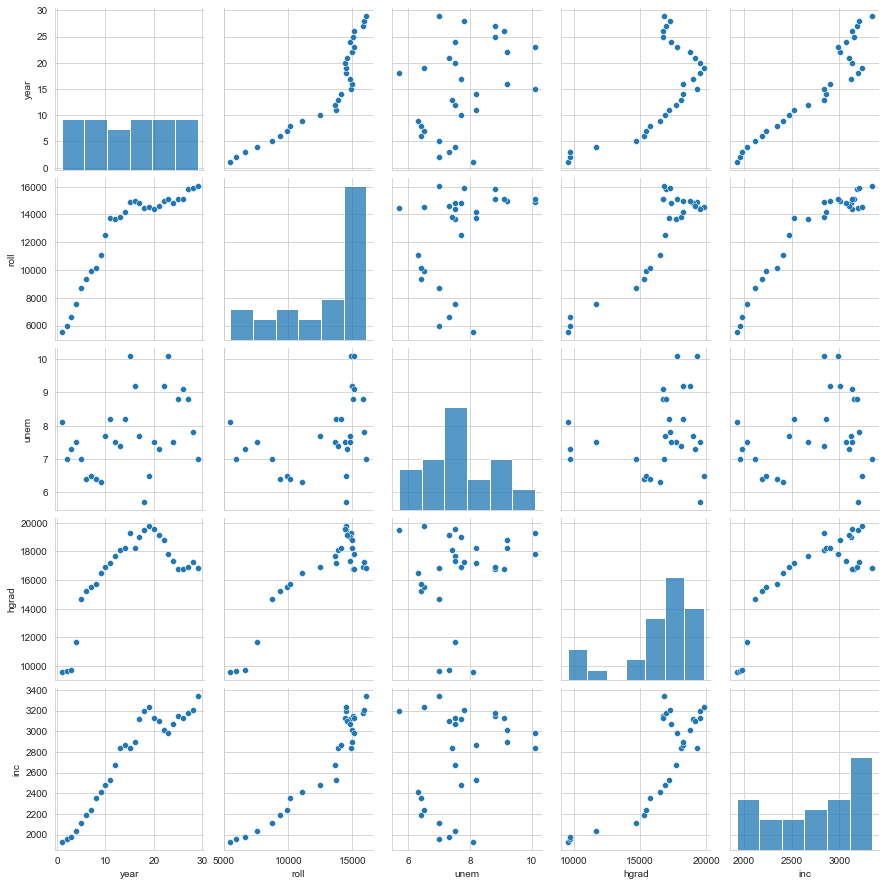

In [23]:
# Checking for correlation
sb.pairplot(enrollmentForecastData)

In [24]:
# Check correlation via Pearson method
# Little linear correlation between unemployment and graduation rates
print(enrollmentForecastData.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [25]:
# Creating a subset dataframe of chosen predictors variables
enrollmentDataSubset = enrollmentForecastData[['unem', 'hgrad']].values

# Setting up the target variable to be predicted
enrollmentTarget = enrollmentForecastData[['roll']].values

enrollmentDataSubsetNames = ['unem', 'hgrad']

# Scaling data before using predictors as variables in a liner regression model
x, y = scale(enrollmentDataSubset), enrollmentTarget

In [26]:
# Checking for missing values
# Utilizing the numpy library's Not A Number (NAN) value to compare against the available x-values
missingValues = x == np.NAN

# Printing out the array of all x-values equivalent to NAN
# No missing values fulfills assumption
print(x[missingValues == True])

[]


In [27]:
# Normalizing values before linear regression
# Deprecated
LinReg = LinearRegression(normalize = True)

LinReg.fit(x, y)
print(LinReg.score(x, y))

0.8488812666133723


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [30]:
# Logistic Regression
# Assumptions:
# 1. Data free of missing values
# 2. Binary or ordinal (Categorical variable with order values) predictant variable
# 3. All predictors independent from one another
# 4. Minimum 50 observations per predictor variable to ensure reliable results

In [33]:
# Variable Descriptions:
# 'Pcalss': Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
# 'SibSp': # of siblings / spouces aboard
# 'Parch': # of parents / children aboard
# 'Fare': Passenger fare in British pounds
# 'Embarked': Port of embarkation (C = Cherbourg, France; Q = Queenstown, UK, S = Southhampton - Cobh, Ireland)
titanicTraining = pd.read_csv('TitanicTrainingData.csv')
titanicTraining.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
                           'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
print(titanicTraining.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [34]:
# Retrieving basic information about the entire given dataset
print(titanicTraining.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<AxesSubplot:xlabel='Survived', ylabel='count'>

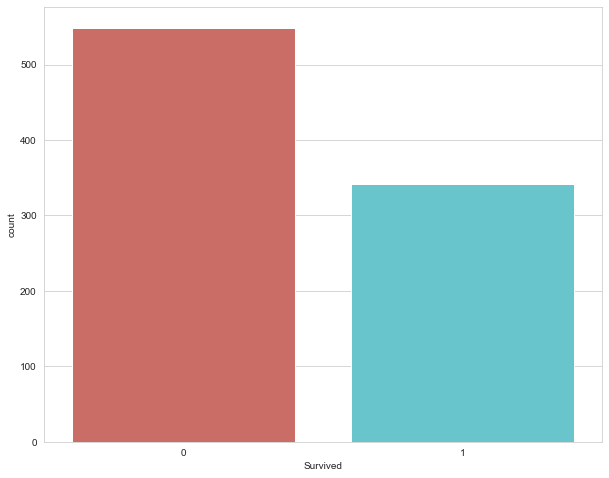

In [35]:
# Checking that the target variable is binary
sb.countplot(x = 'Survived', data = titanicTraining, palette = 'hls')

In [36]:
# Checking for missing values
titanicTraining.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
titanicTraining.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
# Taking care of missing variables and removing unimportant variables
titanicData = titanicTraining.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
print(titanicData.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


<AxesSubplot:xlabel='Parch', ylabel='Age'>

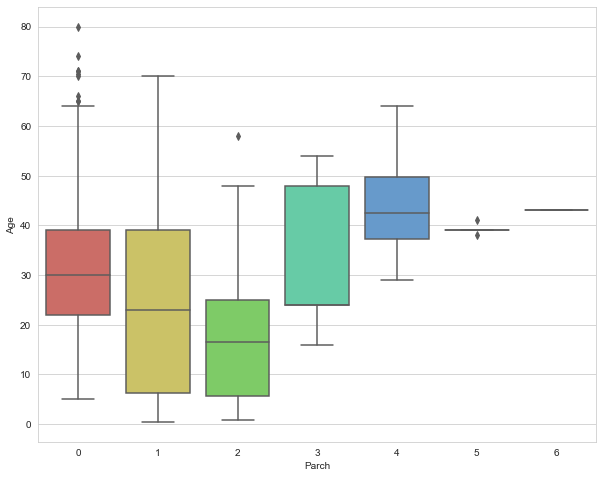

In [40]:
# Imputing Missing Values
sb.boxplot(x = 'Parch', y = 'Age', data = titanicData, palette = 'hls')

In [41]:
# Attempting to approximate missing age values by looking at the average passenger age depending on the
# number of parents and or siblings they had on board with them at the time
parchGroups = titanicData.groupby(titanicData['Parch'])
parchGroups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [49]:
def ageApproximation(cols):
    age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
    else:
        return age

In [53]:
titanicData['Age'] = titanicData[['Age', 'Parch']].apply(ageApproximation, axis = 1)
print(titanicData.isnull().sum())
print('\n')

# Dropping passenger rows with missing embarked values
titanicData.dropna(inplace = True)

# Reset the index due to having dropped the previous rows
titanicData.reset_index(inplace = True, drop = True)

print(titanicData.info())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


In [55]:
# Converting categorical variables to dummy indicators of 0 and 1
labelEncoder = LabelEncoder()
genderCategory = titanicData['Sex']
encodedGender = labelEncoder.fit_transform(genderCategory)
print(encodedGender[0:5])

array([1, 0, 0, 0, 1])

In [56]:
print(titanicData.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [57]:
# 1 = male, 0 = female
genderDataframe = pd.DataFrame(encodedGender, columns = ['Male Gender'])
print(genderDataframe.head())

   Male Gender
0            1
1            0
2            0
3            0
4            1


In [59]:
# Further processing required as this only provides a multi-nomial categorical variable, and has not yet become
# a binary variable
embarkedCategory = titanicData['Embarked']
encodedEmbarkation = labelEncoder.fit_transform(embarkedCategory)
print(encodedEmbarkation[0:100])

[2 0 2 2 2 1 2 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 0 2 1 2 0 0 1 2 0 2 0
 2 2 0 2 2 0 0 1 2 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2]


In [67]:
# Three seperate columns of binary outcomes required for each embarkation option
binaryEncoder = OneHotEncoder(categories = 'auto')

# Reshaping the output into a single column array
embarked1HotArray = binaryEncoder.fit_transform(encodedEmbarkation.reshape(-1,1))
print(embarked1HotArray[0:5])
print('\n')

# Reshaping the output array column into a matrix
embarked1HotMatrix = embarked1HotArray.toarray()
print(embarked1HotMatrix[0:5])
print('\n')

# Transforms the matrix into a dataframe to be reattached to the original dataframe
embarkedDataframe = pd.DataFrame(embarked1HotMatrix, columns = ['C', 'Q', 'S'])
print(embarkedDataframe.head())

  (0, 2)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


     C    Q    S
0  0.0  0.0  1.0
1  1.0  0.0  0.0
2  0.0  0.0  1.0
3  0.0  0.0  1.0
4  0.0  0.0  1.0


In [68]:
# Dropping the original, non-converted categorical variable columns to be replaced and susbstituted
titanicData.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
print(titanicData.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [69]:
# Concatenating the newly encoded variables of gender and embarkation points as columns with a float data type
titanicDummyData = pd.concat([titanicData, genderDataframe, embarkedDataframe], 
                             axis = 1, verify_integrity = True).astype(float)
print(titanicDummyData.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Male Gender  \
0          1.0       0.0     3.0  22.0    1.0    0.0   7.2500          1.0   
1          2.0       1.0     1.0  38.0    1.0    0.0  71.2833          0.0   
2          3.0       1.0     3.0  26.0    0.0    0.0   7.9250          0.0   
3          4.0       1.0     1.0  35.0    1.0    0.0  53.1000          0.0   
4          5.0       0.0     3.0  35.0    0.0    0.0   8.0500          1.0   

     C    Q    S  
0  0.0  0.0  1.0  
1  1.0  0.0  0.0  
2  0.0  0.0  1.0  
3  0.0  0.0  1.0  
4  0.0  0.0  1.0  


<AxesSubplot:>

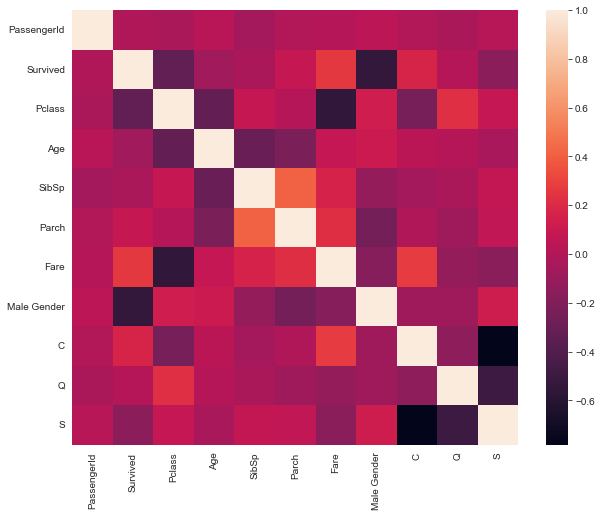

In [70]:
# Checking for independent features
# Basic correlation analysis using a Seaborn heatmap for at a glance view
sb.heatmap(titanicDummyData.corr())

In [72]:
# Dropping variables with close linear relationships
titanicDummyData.drop(['Fare', 'Pclass'], axis = 1, inplace = True)

KeyError: "['Fare', 'Pclass'] not found in axis"

In [73]:
print(titanicDummyData.head())

   PassengerId  Survived   Age  SibSp  Parch  Male Gender    C    Q    S
0          1.0       0.0  22.0    1.0    0.0          1.0  0.0  0.0  1.0
1          2.0       1.0  38.0    1.0    0.0          0.0  1.0  0.0  0.0
2          3.0       1.0  26.0    0.0    0.0          0.0  0.0  0.0  1.0
3          4.0       1.0  35.0    1.0    0.0          0.0  0.0  0.0  1.0
4          5.0       0.0  35.0    0.0    0.0          1.0  0.0  0.0  1.0


In [74]:
# Determining if the dataset is of sufficient size for a reliable logistic regression analysis
# 6 Predictor Features: 6 x 50 = Minimum 300 records required
# 1. Age 
# 2. Gender / Sex
# 3. # Siblings and spouces aboard
# 4. # Parents and children aboard
# 5. Port of embarkation
# 6. Passenger ID (As present in example, not in personal opinion)

# 889 records, minimum requirements met
print(titanicDummyData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   Male Gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB
None


In [75]:
# Seperating dataset into training and test datasets
# Remove the target variable of surviving passengers from the x predictor datasets
xTrain, xTest, yTrain, yTest = train_test_split(titanicDummyData.drop('Survived', axis = 1), 
                                                titanicDummyData['Survived'], test_size = 0.2,
                                                random_state = 200)

In [76]:
# Checking the shapes of the datasets to ensure the seperation was successfull
print(xTrain.shape)
print(yTrain.shape)

(711, 8)
(711,)


In [77]:
print(xTrain.head())

     PassengerId   Age  SibSp  Parch  Male Gender    C    Q    S
719        721.0   6.0    0.0    1.0          0.0  0.0  0.0  1.0
165        167.0  24.0    0.0    1.0          0.0  0.0  0.0  1.0
879        882.0  33.0    0.0    0.0          1.0  0.0  0.0  1.0
451        453.0  30.0    0.0    0.0          1.0  1.0  0.0  0.0
181        183.0   9.0    4.0    2.0          1.0  0.0  0.0  1.0


In [78]:
# Deploying & Evaluating the Logistic Regression Model
LogReg = LogisticRegression(solver = 'liblinear')
LogReg.fit(xTrain, yTrain)

LogisticRegression(solver='liblinear')

In [79]:
# Have the logistic regression model predict passenger survival on the testing data sets
yPrediction = LogReg.predict(xTest)

In [81]:
# Classification Report With Cross Validation
# Decent results at around 80% successfull prediction results
print(classification_report(yTest, yPrediction))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [82]:
# K-fold Cross Validation
yTrainPrediction = cross_val_predict(LogReg, xTrain, yTrain, cv = 5)

# Confusion Matrix
# Top: Predicted Results
#      Positive | Negative
#
# Side: Actual Results
#       Postive
#       Negative
#
# True Positive (TP): 377, False Negative (FN): 63
# False Positive (FP): 91, True Negative (TN): 180
confusion_matrix(yTrain, yTrainPrediction)

array([[377,  63],
       [ 91, 180]])

In [83]:
# Determining the precision score of the logistic regression model
print(precision_score(yTrain, yTrainPrediction))

0.7407407407407407


In [84]:
# Making a test prediction

# Pulling a single row from the processed Titanic dataframe as the basis of a test passenger
print(titanicDummyData[863:864])

     PassengerId  Survived   Age  SibSp  Parch  Male Gender    C    Q    S
863        866.0       1.0  42.0    0.0    0.0          0.0  0.0  0.0  1.0


In [85]:
# Fictitious passenger that is 2 years younger
testPassenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1, -1)
print(testPassenger)

[[866  40   0   0   0   0   0   1]]


In [86]:
# Passenger is predicted to survive at approximately 74%
print(LogReg.predict(testPassenger))
print(LogReg.predict_proba(testPassenger))

[1.]
[[0.26351831 0.73648169]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [91]:
# Clustering Models
# K-Means Clustering

# Iris dataset is a staple of machine learnin and data analytics, has its own method in sklearn
iris = datasets.load_iris()

x = scale(iris.data)
y = pd.DataFrame(iris.target)
variableNames = iris.feature_names

print(x[0:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [92]:
# Building & Running The Clustering Model

# Has default parameters already set for the model
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(x)

KMeans(n_clusters=3, random_state=5)

In [93]:
# Plotting out the model outputs
irisDataframe = pd.DataFrame(iris.data)
irisDataframe.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
y.columns = ['Target']

Text(0.5, 1.0, 'K-Means Classification')

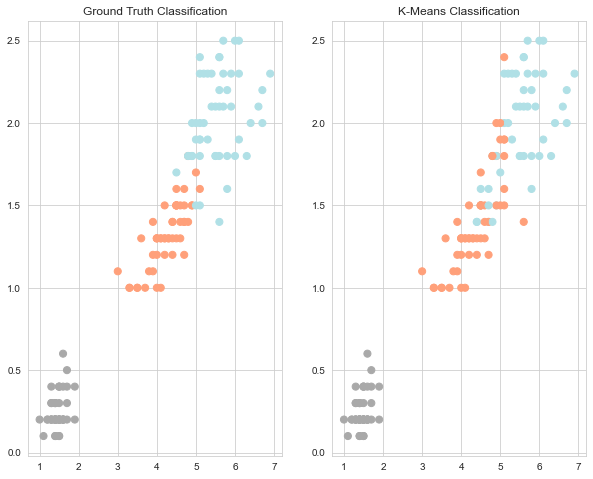

In [96]:
# Relabeling the cluster labels so as to match colors
relabel = np.choose(clustering.labels_, [2, 0 , 1]).astype(np.int64)

colorTheme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
plt.subplot(1, 2, 1)

# Genuine Classification Results
plt.scatter(x = irisDataframe.PetalLength, y = irisDataframe.PetalWidth, c = colorTheme[iris.target], s= 50)
plt.title('Ground Truth Classification')
plt.subplot(1, 2, 2)

# K-Means Clustering
#plt.scatter(x = irisDataframe.PetalLength, y = irisDataframe.PetalWidth, c = colorTheme[clustering.labels_], s= 50)
plt.scatter(x = irisDataframe.PetalLength, y = irisDataframe.PetalWidth, c = colorTheme[relabel], s= 50)
plt.title('K-Means Classification')

In [97]:
# Evaluating clustering results
# Machine learning desires both high precision and high recall
# Precision: Measure of the model's relevancy
# Recall: Measure of the model's completeness
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [104]:
# Hierarchical Clustering

# Loading in cars data
cars = pd.read_csv('mtcars.csv')
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

x = cars[['mpg', 'disp', 'hp', 'wt']].values

# Target is type of transmission
y = cars.iloc[:, (9)].values

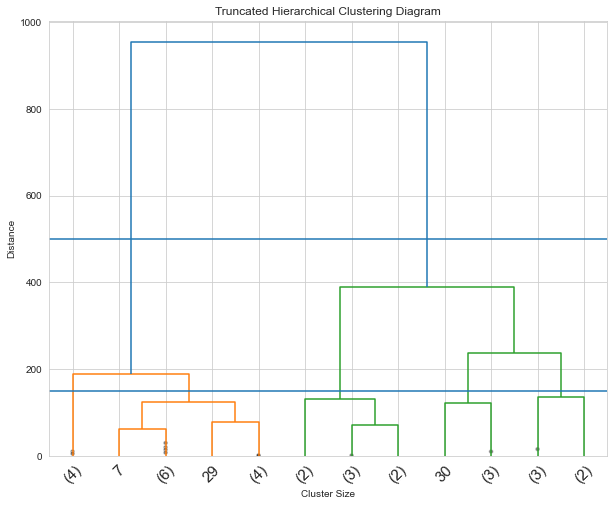

In [103]:
# Using scipy to generate dendrograms
# Result generated from scipy hierarchical clustering method
# 'ward': Using the word associating method for clustering
z = linkage(x, 'ward')
dendrogram(z, truncate_mode = 'lastp', p = 12, leaf_rotation = 45., leaf_font_size = 15, show_contracted = True)

plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y = 500)
plt.axhline(y = 150)
plt.show()

# In attempting to cluster by transmission type, only 2 clusters are desired for automatica and manual cars
# Dendrogram provides ability to see best distances to use when clustering to reach 2 clusters

In [106]:
# Generating the hierarchical cluster
# 'affinity': How distance is calculated

# Attempt different iterations to determine the most accurate model
# 'ward': 0.78125
# 'average': 0.78125
# 'manhattan' & 'average': 0.71875
k = 2
Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
Hclustering.fit(x)
sklearn.metrics.accuracy_score(y, Hclustering.labels_)

0.78125

In [110]:
# DBSCAN Clustering To Identify Outliers

# Select all rows for index columns 0 to 3
dbscanData = irisDataframe.iloc[:, 0:4].values

# Selecting all rows for index column 4
target = irisDataframe.iloc[:, 3:4].values

print(irisDataframe.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


In [111]:
# 'eps': Maximum distance between two points where they can still be considered as within the same neighborhood
# 'min_samples': A core point must have a minimum of 'x' samples
dbscanModel = DBSCAN(eps = 0.8, min_samples = 19).fit(dbscanData)
print(dbscanModel)

DBSCAN(eps=0.8, min_samples=19)


In [113]:
# Visualizing Results
# No more than 5% of the total number of datapoints should be labeled as outliers
outliersDataframe = pd.DataFrame(dbscanData)

print(Counter(dbscanModel.labels_))

# Prinintg out only those model labels equal to -1 for the outliers dataframe
print(outliersDataframe[dbscanModel.labels_== -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN For Outlier Detection')

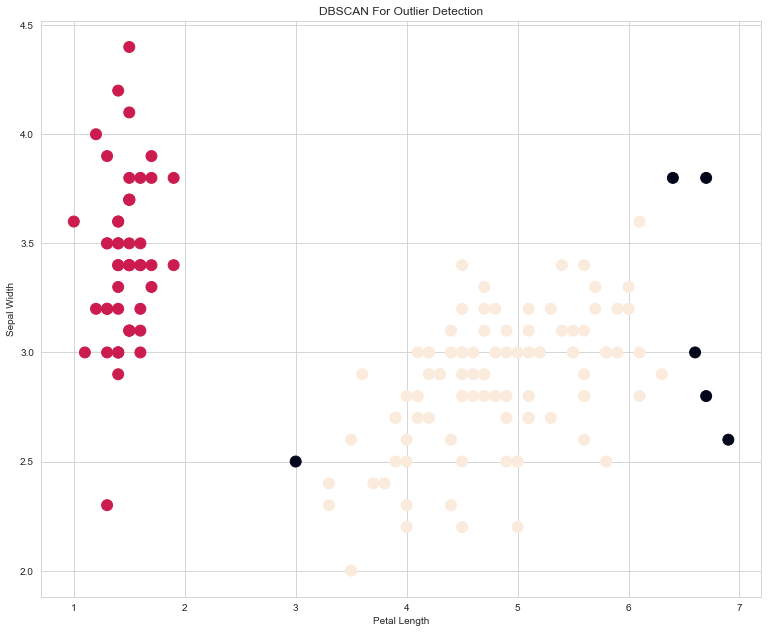

In [116]:
figure = plt.figure()
axes = figure.add_axes([0.1, 0.1, 1, 1])

# Setting the colors to those of the pre-existing model's labels
colors = dbscanModel.labels_

# Creating a scatterplot
# Red & Pink points represent the core points and are part of the clusters
# Black points are collective outliers
axes.scatter(dbscanData[:, 2], dbscanData[:, 1], c = colors, s = 120)
axes.set_xlabel('Petal Length')
axes.set_ylabel('Sepal Width')
plt.title('DBSCAN For Outlier Detection')

In [118]:
# Factor Analysis
# Method which explores a dataset in order to find root causes which explain why data is acting in a certain way
# Factors: Latent Variables - Meaningful but that are inferred and not directly observable
# Assumptions:
# 1. Factors are metric
# 2. Features are continous or ordinal
# 3. There is R > 0.3 correlation between the features within the dataset
# 4. There are observations > 100 with at least each feature having > 5 observations each
# 5. The overall sample dataset is homogenous

# Factor Loading: Output
# -1 or 1: Factor has a strong influence upon the given variable
# 0: Factor has a weak influence upon the given variable
# > 1: Factors are highly correlated

# Iris Dataset
x = iris.data
variableNames = iris.feature_names

print(x[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [119]:
# Factor 0: Highly influential on sepal length, petal length and width
# Factor 1: Little influence throughout, should be dropped

factor = FactorAnalysis().fit(x)
factorDataframe = pd.DataFrame(factor.components_, columns = variableNames)
print(factorDataframe)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


In [122]:
# Principal Component Anlaysis
# Unsupervised machine learning algorythm that discovers relationships between variables and reduces variables down
# to a pricipal components

# Principal Components:
# Uncorrelated features tham embody a dataset's important information ('variance') with the redundancy, 
# noise and outliers stripped out

# Singular Value Decomposition:
# Linear algebra method that decomposes a matrix into 3 resultant matrices in order to reduce 
# information redundancy and noise, most commonly used in principal component analysis

# Both factor and principal components represent what is left of a dataset after information redundancy and noise
# have been stripped out

# Iris Data Set sample
print(x[0:10,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [125]:
pca = decomposition.PCA()
irisPCA = pca.fit_transform(x)

# Explained Variance Ratio
# Tells us how much information is compressed into the first few components
# First component explains 92.4% of the variance and information of the dataset
# First 2 components are kept
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [126]:
# Cumulative Variance
# At least 70% of the original dataset's information must be retained when deciding how many
# components to keep
# PCA's purpose is to remove noise, redudnant information and outliers, so you don't 
print(pca.explained_variance_ratio_.sum())

1.0


In [129]:
irisComponents = pd.DataFrame(pca.components_, columns = variableNames)
print(irisComponents)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831
3          -0.315487          0.319723           0.479839         -0.753657


<AxesSubplot:>

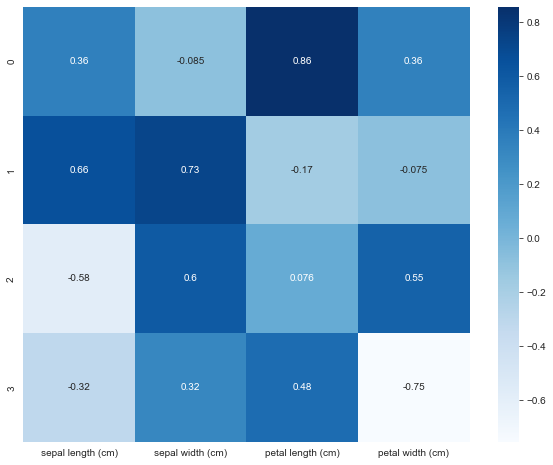

In [130]:
# Components used in machine learning algorithms
sb.heatmap(irisComponents, cmap = 'Blues', annot = True)

In [133]:
# Association Rule Mining
# Process that deploys pattern recognition to identify and quantify 
# relationships between different, yet related items
# If item 'x' is purchased, then probability that item 'y' will be purchase is z ({x} -> {y})
# Mesured by:
# Support: Relative frequency of an item within a dataset, support(A -> C) = support (A U C)
# Confidence: Probability of seeing the consequent ('then' term) item 'x' within the data given said data also
# contained the antecedent ('if' term) item 'y'; how likely 'y' is purchased given 'x' has been 
# Measures how many if-then statements are found to be true in a dataset
# confidence(A -> C) = support(A -> C) / support(A)
# Lift: Measures how much more often the antecedent and consequent occur together rather than them occurring
# independently, lift(A -> C) = confidence(A -> C) / support(C)
# Lift Scores:
# > 1: A highly associated with C, if A occurs, C is likely to occur
# < 1: If A occurs, C is unlikely to occur
# = 1: No association between items A and C

# Feature Engineering
# Process of engineering data into a predicitive feature that fits the requirements and / or improves the 
# performance of a machine learning mode

# Apriori algorithm used to implement association rule mining over structured data

In [137]:
# Formatting the data
# Each row is a transaction
groceriesData = pd.read_csv('Groceries.csv')
groceriesData.head()

,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN


In [136]:
# Data Conversion
# Data must be converted to a sparce format for apriori to function
basketSets = pd.get_dummies(groceriesData)
basketSets.head()

,1_Instant food products,1_UHT-milk,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,1_beverages,...,9_sweet spreads,9_tea,9_vinegar,9_waffles,9_whipped/sour cream,9_white bread,9_white wine,9_whole milk,9_yogurt,9_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# Calculating Support
# Deprecated
# Support indicates how popular an item is based on the total number of transactions it makes up
# Use column names or indexes will be presented
# Is only showing single items, reduce support to find item sets
apriori(basketSets, min_support = 0.02, use_colnames = True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.030421,(1_beef)
1,0.034951,(1_canned beer)
2,0.029126,(1_chicken)
3,0.049191,(1_citrus fruit)
4,0.064401,(1_frankfurter)
5,0.044660,(1_other vegetables)
6,0.024272,(1_pip fruit)
7,0.040453,(1_pork)
8,0.038835,(1_rolls/buns)
9,0.033981,(1_root vegetables)


In [141]:
frequentItemSets = apriori(basketSets, min_support = 0.002, use_colnames = True)
frequentItemSets['length'] = frequentItemSets['itemsets'].apply(lambda x: len(x))
frequentItemSets

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.006472,(1_UHT-milk),1
1,0.030421,(1_beef),1
2,0.011974,(1_berries),1
3,0.008414,(1_beverages),1
4,0.014887,(1_bottled beer),1
...,...,...,...
844,0.002265,"(3_pip fruit, 5_other vegetables, 6_whole milk)",3
845,0.002589,"(4_other vegetables, 3_root vegetables, 5_whol...",3
846,0.002913,"(3_whole milk, 5_yogurt, 4_curd)",3
847,0.003236,"(4_root vegetables, 5_other vegetables, 6_whol...",3


In [142]:
# Filtering out single items for minum combinations of 3
frequentItemSets[frequentItemSets['length'] >= 3]

,support,itemsets,length
820,0.002589,"(3_other vegetables, 1_beef, 2_root vegetables)",3
821,0.002589,"(3_whole milk, 2_other vegetables, 1_chicken)",3
822,0.002589,"(1_citrus fruit, 2_other vegetables, 3_whole m...",3
823,0.003236,"(2_tropical fruit, 3_pip fruit, 1_citrus fruit)",3
824,0.002589,"(1_citrus fruit, 4_whole milk, 3_other vegetab...",3
825,0.002265,"(1_frankfurter, 5_other vegetables, 6_whole milk)",3
826,0.002265,"(3_other vegetables, 4_whole milk, 1_pork)",3
827,0.003560,"(3_whole milk, 2_other vegetables, 1_root vege...",3
828,0.002589,"(1_sausage, 2_rolls/buns, 3_soda)",3
829,0.002265,"(3_other vegetables, 1_sausage, 4_whole milk)",3


In [144]:
# Generating Association Rules
# Confidence
rules = association_rules(frequentItemSets, metric = 'confidence', min_threshold = 0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
1,(7_pastry),(1_frankfurter),0.005178,0.064401,0.002589,0.500000,7.763819,0.002256,1.871197
2,(2_ham),(1_sausage),0.007120,0.076052,0.004531,0.636364,8.367505,0.003989,2.540858
3,(2_meat),(1_sausage),0.006796,0.076052,0.004854,0.714286,9.392097,0.004338,3.233819
4,(3_beef),(1_sausage),0.004854,0.076052,0.002589,0.533333,7.012766,0.002220,1.979889


In [145]:
# Lift
rules = association_rules(frequentItemSets, metric = 'lift', min_threshold = 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_beef),(2_citrus fruit),0.030421,0.028803,0.005502,0.180851,6.278986,0.004625,1.185618
1,(2_citrus fruit),(1_beef),0.028803,0.030421,0.005502,0.191011,6.278986,0.004625,1.198508
2,(1_beef),(2_other vegetables),0.030421,0.058900,0.003236,0.106383,1.806173,0.001444,1.053136
3,(2_other vegetables),(1_beef),0.058900,0.030421,0.003236,0.054945,1.806173,0.001444,1.025950
4,(1_beef),(2_root vegetables),0.030421,0.036893,0.005502,0.180851,4.902016,0.004379,1.175741


In [146]:
# Optimizing Confidence & Lift
# 76 Combinations meet the requirements
rules[(rules['lift'] >= 5) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
137,(7_pastry),(1_frankfurter),0.005178,0.064401,0.002589,0.500000,7.763819,0.002256,1.871197
238,(2_ham),(1_sausage),0.007120,0.076052,0.004531,0.636364,8.367505,0.003989,2.540858
243,(2_meat),(1_sausage),0.006796,0.076052,0.004854,0.714286,9.392097,0.004338,3.233819
259,(3_beef),(1_sausage),0.004854,0.076052,0.002589,0.533333,7.012766,0.002220,1.979889
...,...,...,...,...,...,...,...,...,...
958,"(4_root vegetables, 5_other vegetables)",(6_whole milk),0.005178,0.009385,0.003236,0.625000,66.594828,0.003188,2.641640
959,"(4_root vegetables, 6_whole milk)",(5_other vegetables),0.003883,0.012621,0.003236,0.833333,66.025641,0.003187,5.924272
964,"(7_butter, 5_other vegetables)",(6_whole milk),0.002589,0.009385,0.002265,0.875000,93.232759,0.002241,7.924919
965,"(7_butter, 6_whole milk)",(5_other vegetables),0.002913,0.012621,0.002265,0.777778,61.623932,0.002229,4.443204


In [148]:
# Neural Networks
# Fundamental Concepts:
# 1. Input Layer
# 2. Weights & Bias
# 3. Weighted Sum
# 4. Activation Function: Mathematical function deployed on each unit in a neural network
# All units in a shared layer deploy the same activation function
# Purpose is to enable neural netwrok to model complex, nonlinear problems
# Types: Linear, Logistic Sigmoid, Threshold (binary features), ReLU (Rectified Lineau Unit), Softmax
# 5. Linear Separability: Data if it can be cleanly classified into 1 of 2 classes, required for perceptron

# Perceptron: Single layer neural network
# Linear classifier that outputs a binary response variable, alogrithm called Linear Binary Classifier
# Creates a simple linear model of a phenomenon

# Using built-in sklearn Iris dataset
xIris = iris.data
yIris = iris.target

# Splitting data into training and test sets
xIrisTrain, xIrisTest, yIrisTrain, yIritsTest = train_test_split(xIris, yIris, test_size = 0.2)

In [152]:
# Instantiating a StandardScaler object
irisStandardize = StandardScaler()

# Normalizing the data
# Generating standardized training and test sets
standardizedXIrisTest = irisStandardize.fit_transform(xIrisTest)
standardizedXIrisTrain = irisStandardize.fit_transform(xIrisTrain)

In [153]:
# Looking at first 10 records / rows with all columns
standardizedXIrisTest[0:10,]

array([[ 0.72462181, -0.12820857,  1.11367979,  1.30082778],
       [-0.92802442,  0.97072202, -1.39923872, -1.39054004],
       [-1.05515105,  2.06965261, -1.28501515, -1.39054004],
       [ 0.59749518, -0.40294122,  0.25700303,  0.08971226],
       [-2.07216412, -0.12820857, -1.57057407, -1.52510843],
       [ 0.21611528, -0.12820857,  0.42833838,  0.22428065],
       [-1.05515105,  1.24545467, -1.39923872, -1.25597165],
       [-0.54664452, -2.0513371 ,  0.08566768,  0.08971226],
       [ 0.47036854,  0.69598937,  1.22790336,  1.70453296],
       [-0.54664452, -1.77660445, -0.02855589, -0.17942452]])

In [155]:
# Setting up the now standardized datasets so that the model will only go over it a maximum of 50 times
# 'max_iter': Maximum number of iterations
# 'eta0: Setting the learning rate to 0.15
# 'random_state': Randomizer seed, simply for reproducability
irisPerceptron = Perceptron(max_iter = 50, eta0 = 0.15, tol = 1e-3, random_state = 15)

# Training the model
# '.ravel()': Formats the yIrisTrain dataset properly for the model
irisPerceptron.fit(standardizedXIrisTrain, yIrisTrain.ravel())

Perceptron(eta0=0.15, max_iter=50, random_state=15)

In [158]:
yIrisPrediction = irisPerceptron.predict(standardizedXIrisTest)

In [159]:
print(yIritsTest)
print(yIrisPrediction)

[2 0 0 1 0 1 0 1 2 1 2 1 1 1 2 2 1 0 1 2 2 1 1 1 0 1 2 0 0 0]
[2 0 0 1 0 1 0 1 2 1 2 1 1 1 2 2 0 0 1 2 2 1 1 1 0 0 2 0 0 0]


In [162]:
# Checking accuracy of perceptron which acted as a classifier in this scenario
print(classification_report(yIritsTest, yIrisPrediction))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00         8

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [166]:
# K-Nearest Neighbor Classification
# Supervised classifier that memorizes observation from within a test set to predict classification 
# labels for new unlabeled observations
# Assumptions:
# 1. Data has little noise
# 2. Dataset is labeled
# 3. Dataset contains only relevant features
# 4. Dataset has distinguishable subgroups
# Note: Avoid using on large datasets to to computation heavy methodology, takes a long time

# Importing the cars dataset
cars = pd.read_csv('mtcars.csv')
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

xCarsPrime = cars[['mpg', 'disp', 'hp', 'wt']].values
yCars = cars.iloc[:, 9].values

In [169]:
xCarsScaled = preprocessing.scale(xCarsPrime)

In [170]:
# Splitting data into training and testing datasets
xCarsTrain, xCarsTest, yCarsTrain, yCarsTest = train_test_split(xCarsScaled, yCars, 
                                                                test_size = 0.2, random_state = 17)

In [173]:
# Building & Training KNN Model
carsClassifier = neighbors.KNeighborsClassifier()
carsClassifier.fit(xCarsTrain, yCarsTrain)
print(carsClassifier)

KNeighborsClassifier()


In [175]:
# Evaluating Model Predictions
yCarsPrediction = carsClassifier.predict(xCarsTest)
yCarsExpected = yCarsTest

print(metrics.classification_report(yCarsExpected, yCarsPrediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



In [176]:
# Decision Trees
# Decision support tool that models decisions in order to predict probable outcomes of those decison
# Non robust, sensitive to training data
# Root Node: Entire population or sample, becomes further divided into 2 or more homogenous sets
# Decision Node: Subnode that further splits into even more subnodes
# Leaf Node: End node, furthest subnode which no longer splits

# Decision Tree Algorithms
# Class of supervised machine learning methods useful for making predicitons from non-linear data
# Appropriate for continous or categorical input or output variables

# Assumptions:
# 1. Root node comprises the entire training set
# 2. Predictive features are either categorical, or if continous have been binned priop to the model's deployment
# 3. Rows within the dataset have a recursive distribution based on the values of attributes

# Recursive Binary Splitting
# Proccess used to segment prediction space into regions in order to create a binary decision tree
# Stops whn user-defined criteria are met
# Every stage where a region is split:
# Regression Trees: Loss function calculated via Sum Squared Errors to indentify best split, 
# Top down, greedy, best for continous data
# Classification Trees: Gini index calculates loss function, for binary, best for categorical data

# Tree Prunning: Overcome model overfiting by removing subnodes of decision trees, replace them with leaf nodes
# Hold Out Test: Faster, simpler
# Cost Conplexity

In [183]:
# Naive Bayes Models
# Machine learning method used to predict likelihood that an even will occur given evidence present in the data
# Essentially a conditional probability model, P(B|A) = P(A & B) / P(A)
# Multinomial: When features are categorical or continous
# Bernoulli: Binary features
# Gaussian: Normally distributed features

# Assumptions:
# 1. Predictors are independent from one another
# 2. A Priori Assumption: Past conditions will hold true based on previous historical values
# Applies to all regression models in fact

# Dataset composed of continous variables that describe word frequency count
# Multinomial Naive Bayes best suited in this situation
spambaseUrl = 'https://archive.ics.edu/ml/machine-learning-databases/spambase/spambase.data'

#spambaseRawData = urllib.request.urlopen(spambaseUrl)
spambaseRawData = 'Spambase.data'
spambaseDataset = np.loadtxt(spambaseRawData, delimiter = ',')
print(spambaseDataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [187]:
# Anlyze features and predictive variables already standardized 
# on the same scale pertaining to word frequency count, 48 variables
xSpambase = spambaseDataset[:, 0:48]
ySpambase = spambaseDataset[:, -1]

In [188]:
xSpambaseTrain, xSpambaseTest, ySpambaseTrain, ySpambaseTest = train_test_split(xSpambase, ySpambase, 
                                                                                test_size = 0.2, random_state = 17)

In [198]:
# Bernouilli Model
#BernNB = BernoulliNB(binarize = True)
BernNB = BernoulliNB(binarize = 0.1)
BernNB.fit(xSpambaseTrain, ySpambaseTrain)
print(BernNB)

ySpambaseExpected = ySpambaseTest
ySpambasePredicted = BernNB.predict(xSpambaseTest)

print(accuracy_score(ySpambaseExpected, ySpambasePredicted))

BernoulliNB(binarize=0.1)
0.9109663409337676


In [194]:
# Multinomial Model
MultiNB = MultinomialNB()
MultiNB.fit(xSpambaseTrain, ySpambaseTrain)
print(MultiNB)

ySpambasePredicted = MultiNB.predict(xSpambaseTest)

print(accuracy_score(ySpambaseExpected, ySpambasePredicted))

MultinomialNB()
0.8816503800217155


In [197]:
# Gaussian Model
GaussNB = GaussianNB()
GaussNB.fit(xSpambaseTrain, ySpambaseTrain)
print(GaussNB)

ySpambasePredicted = GaussNB.predict(xSpambaseTest)

print(accuracy_score(ySpambaseExpected, ySpambasePredicted))

GaussianNB()
0.8197611292073833


In [201]:
# Ensemble Models
# Machine learning methods which combine several base models to produce 
# one optimal predictive model and improve overall performance
# Methods: 
# Max Voting: Pick results based on majority votes form different models, generally for classification
# Averaging: Multiple methods results are averaged together, both for classifcation and regression
# Weighted Averaging: Averaging method with each model given a certain weight
# Bagging: Multiple model results combined for final result, subsets of original data run on different models
# and aggregated, often used by decision trees, works in parallel
# Boosting: Multiple models run sequentially over and over
# 1. Subset of data created
# 2. A model is run on the subset to get predictions
# 3. Prediction errors are calculated
# 4. Weights assigned to incorrect prediction
# 5. Another model is created with the same data to produce the next subset of data
# 6. Cycel repeats until a strong learner is created

# Random Forest
# Classification & Regression Ensemble Model, Decision Tree Based
# Algorithm takes average of all votes from all trees in the ensemble, becomes predicted value of target variable
# 1. Create random forest subset from original data
# 2. Randomly select set of features at each node in decision tree
# 3. Decide best split
# 4. For each subset of data, a seperate base learner mode is created
# 5. Final prediction computed by averaging predictions from all other individual model
# Advantages: Highly Flexible, good accuracy, good for large datasets, avoids overfitting due to averaging
# Disadvantages: Not for continous variables, does not like sparse datasets, 
# computationally expensive, no interpretability

# Using built-in sklearn Iris dataset
# Attempting to predict species type as the target
xIris = pd.DataFrame(iris.data, columns = iris.feature_names)
yIris = pd.DataFrame(iris.target)

yIris.columns = ['labels']

print(xIris.head())
yIris[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


In [202]:
# Checking for missing values
xIris.isnull().any() == True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [203]:
print(yIris.labels.value_counts())

0    50
1    50
2    50
Name: labels, dtype: int64


In [207]:
# Preparing the data
# Creating training & test datasets
xIrisTrain, xIrisTest, yIrisTrain, yIrisTest = train_test_split(xIris, yIris, test_size = 0.2, random_state = 17)

In [208]:
# Building The Random Forest Model
# 'n_estimators': The number of decision tree models to generate
irisClassifier = RandomForestClassifier(n_estimators = 200, random_state = 0)

# Reformat the 'y' target data to conform to the requirements of the model
yIrisTrainArray = np.ravel(yIrisTrain)

irisClassifier.fit(xIrisTrain, yIrisTrainArray)

yIrisPrediction = irisClassifier.predict(xIrisTest)

In [210]:
# Evaluating the model on the test data
print(metrics.classification_report(yIrisTest, yIrisPrediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [211]:
yIrisTestArray = np.ravel(yIrisTest)
print(yIrisTestArray)
print(yIrisPrediction)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]
[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]
